In [11]:
import pandas as pd
import sys
import os
from sklearn.model_selection import train_test_split
import importlib

In [16]:
import utilities
importlib.reload(utilities)
from utilities import plot_countplot, prepare_data

In [4]:
# Add src/ directory to Python path
sys.path.append(os.path.abspath('../src'))

In [5]:
# Define the data directory
DATA_DIR = '../data/'

In [6]:
FINAL_DATA = os.path.join(DATA_DIR , 'tagged_titles_df_final.csv')

In [14]:
df = pd.read_csv(FINAL_DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38214 entries, 0 to 38213
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Record Number  38214 non-null  int64 
 1   Aspect Value   38213 non-null  object
 2   Aspect Name    38214 non-null  object
dtypes: int64(1), object(2)
memory usage: 895.8+ KB


In [8]:
aspect_names = df['Aspect Name'].unique()
print(aspect_names, f'Total Aspect Names: {len(aspect_names)} ', sep='\n\n')


['B-Modell' 'B-Marke' 'B-Produktlinie' 'B-Schuhschaft-Typ' 'B-Farbe'
 'B-US-Schuhgröße' 'B-EU-Schuhgröße' 'B-No Tag' 'I-No Tag' 'B-Akzente'
 'B-Abteilung' 'B-Produktart' 'B-Muster' 'B-Stil' 'B-Zwischensohlen-Typ'
 'B-Obermaterial' 'B-Herstellernummer' 'B-Gewebeart' 'B-Verschluss'
 'B-Erscheinungsjahr' 'B-Anlass' 'I-Produktlinie' 'B-Aktivität'
 'I-Abteilung' 'B-Besonderheiten' 'B-Maßeinheit' 'B-Thema'
 'B-UK-Schuhgröße' 'B-Dämpfungsgrad' 'B-Herstellungsland und -region'
 'I-Produktart' 'B-Schuhweite' 'B-Jahreszeit' 'B-Laufsohlenmaterial'
 'B-Innensohlenmaterial' 'B-Obscure' 'I-Farbe' 'I-Modell'
 'B-Futtermaterial' 'B-Charakter' 'B-Stollentyp' 'B-Charakter Familie'
 'I-Marke' 'I-Zwischensohlen-Typ' 'I-Aktivität' 'I-Anlass' 'I-Obscure'
 'I-EU-Schuhgröße' 'I-UK-Schuhgröße' 'I-Besonderheiten' 'I-Obermaterial']

Total Aspect Names: 51 


In [29]:
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Index: 30571 entries, 35066 to 15795
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Record Number  30571 non-null  int64 
 1   Aspect Value   30571 non-null  object
 2   Aspect Name    30571 non-null  object
dtypes: int64(1), object(2)
memory usage: 955.3+ KB


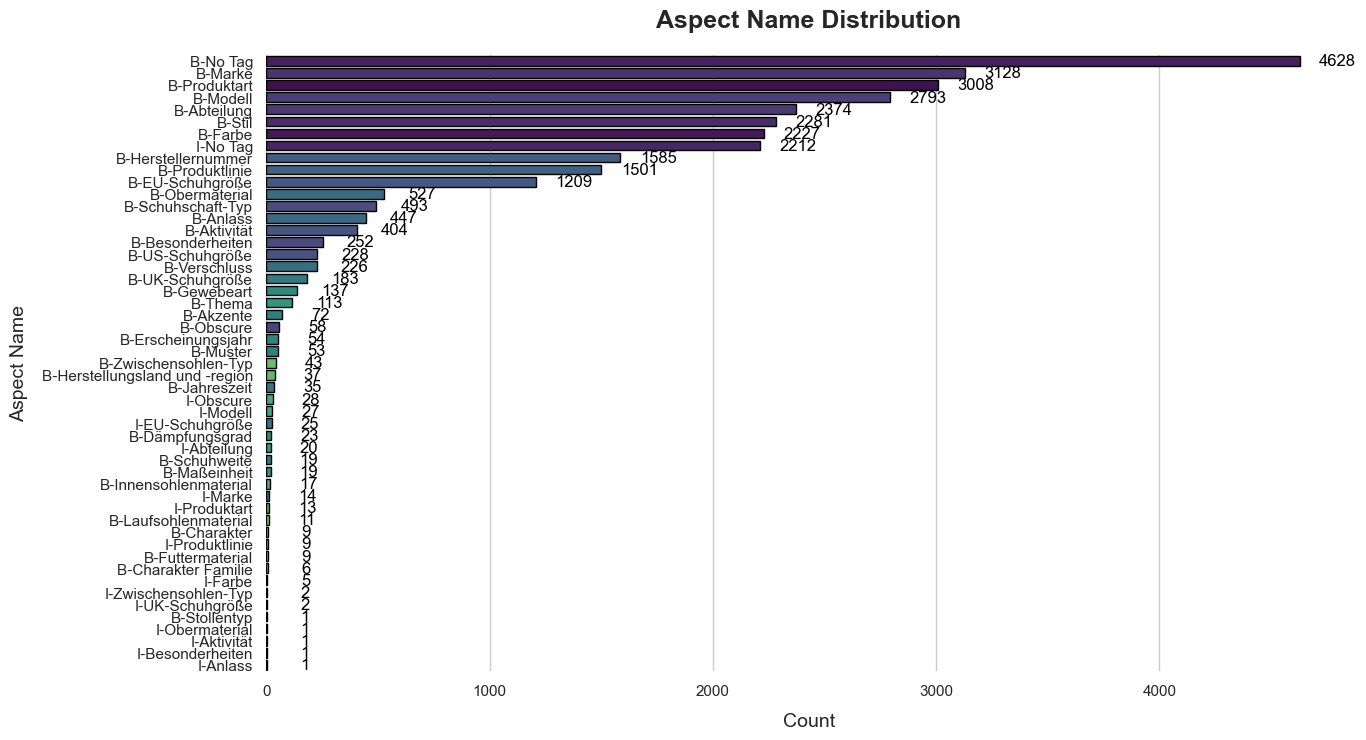

In [30]:
train_df.info()
plot_countplot(train_df)

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 26182 to 34538
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Record Number  7643 non-null   int64 
 1   Aspect Value   7642 non-null   object
 2   Aspect Name    7643 non-null   object
dtypes: int64(1), object(2)
memory usage: 238.8+ KB


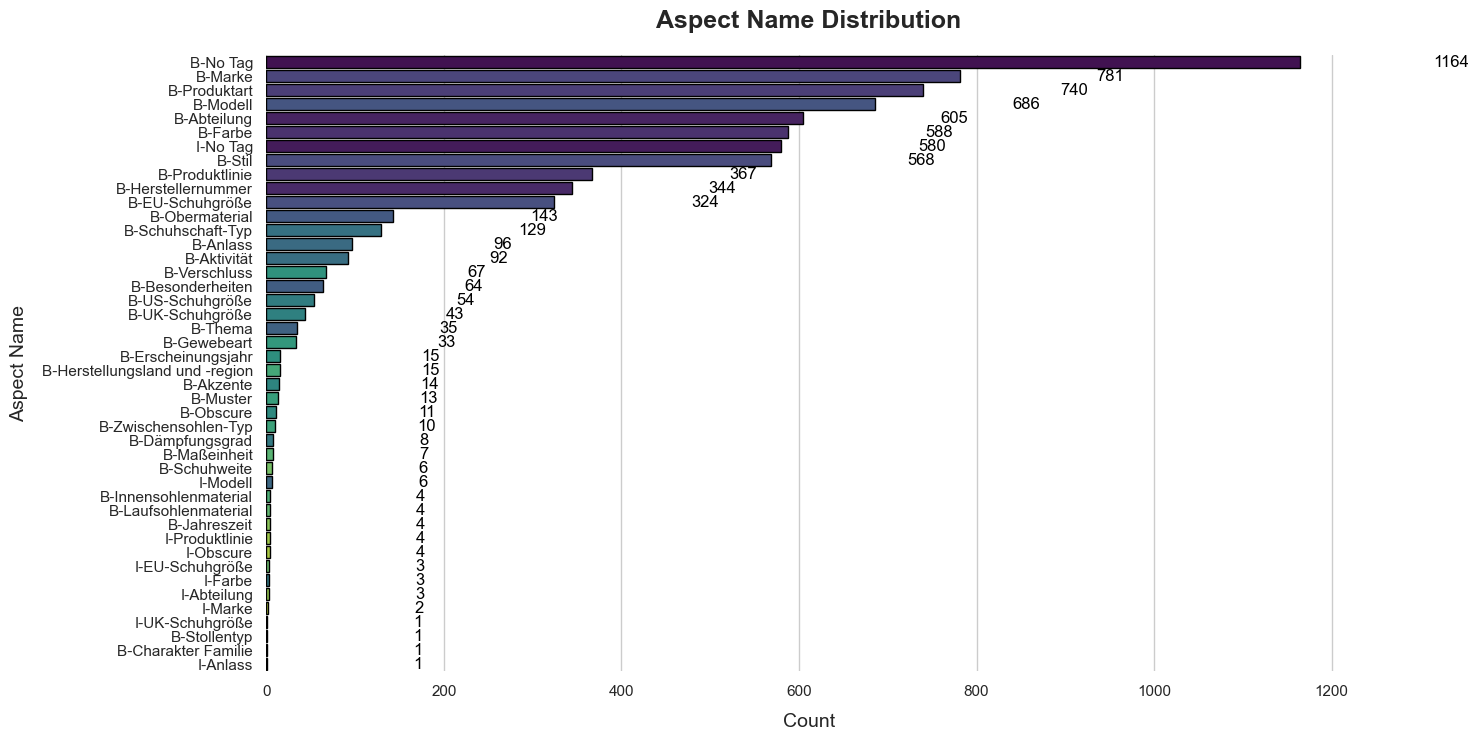

In [31]:
eval_df.info()
plot_countplot(eval_df)

In [33]:
train_data = prepare_data(train_df)
train_data.head()

,sentence_id,words,labels
0,1,Supreme,B-Modell
1,1,Air Force,B-Produktlinie
2,1,Supreme,B-No Tag
3,1,EU44,B-EU-Schuhgröße
4,1,Red,B-Farbe


In [34]:
eval_data = prepare_data(eval_df)
eval_data.head()

,sentence_id,words,labels
0,1,By any Means,B-Modell
1,1,US10,B-US-Schuhgröße
2,2,530,B-Modell
3,3,MICHAEL KORS,B-Marke
4,5,",",B-No Tag
